# Analyse Initial (IDA)

## Importation des bibiothèque et chagement du dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("data/dataset.xlsx")

In [3]:
df = data.copy()
print(f"{df.shape[0]} lignes, {df.shape[1]} colonnes")
df

918 lignes, 12 colonnes


,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
num_cols = df.select_dtypes(exclude='object').columns
objet_cols = df.select_dtypes(exclude=np.number).columns

In [6]:
print("Variables qualitatives")
df[objet_cols]

Variables qualitatives


,SEXE,TDT,ECG,ANGINE,PENTE
0,homme,AA,Normal,Non,Ascendant
1,femme,DNA,Normal,Non,Plat
2,homme,AA,ST,Non,Ascendant
3,femme,ASY,Normal,Oui,Plat
4,homme,DNA,Normal,Non,Ascendant
...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat
914,homme,ASY,Normal,Non,Plat
915,homme,ASY,Normal,Oui,Plat
916,femme,AA,LVH,Non,Plat


In [7]:
print("Variables numériques")
df[num_cols]

Variables numériques


,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


`GAJ` est une variable discrète elle doit donc être parmis les variables qualitatives

`CŒUR` a aussi été recodé elle devrait normalement parmis les variables qualitatives

In [8]:
# Je convertis en liste pour pouvoir faire un append des variables GAJ et COEUR
objet_cols = objet_cols.to_list()
objet_cols.append('GAJ')
objet_cols.append('CŒUR')

In [9]:
num_cols = num_cols.drop(['GAJ', 'CŒUR'])

In [10]:
df[objet_cols]

,SEXE,TDT,ECG,ANGINE,PENTE,GAJ,CŒUR
0,homme,AA,Normal,Non,Ascendant,0,0
1,femme,DNA,Normal,Non,Plat,0,1
2,homme,AA,ST,Non,Ascendant,0,0
3,femme,ASY,Normal,Oui,Plat,0,1
4,homme,DNA,Normal,Non,Ascendant,0,0
...,...,...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat,0,1
914,homme,ASY,Normal,Non,Plat,1,1
915,homme,ASY,Normal,Oui,Plat,0,1
916,femme,AA,LVH,Non,Plat,0,1


Ajout des variables `GAJ` et `CŒUR` parmis les variables qualitatives

## Statistiques élémentaires

In [11]:
print("Stat sur les quali")
df[objet_cols].select_dtypes(exclude=np.number).describe()

Stat sur les quali


,SEXE,TDT,ECG,ANGINE,PENTE
count,918,918,918,918,918
unique,2,4,3,2,3
top,homme,ASY,Normal,Non,Plat
freq,725,496,552,547,460


In [12]:
print("Stat sur les quanti")
df[num_cols].describe()

Stat sur les quanti


,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [13]:
df.isna().sum().sum()

0

Nous n'avons accune valeur manquante sur l'ensemble du dataset

## Analyse Univariée

### Variables qualitatives

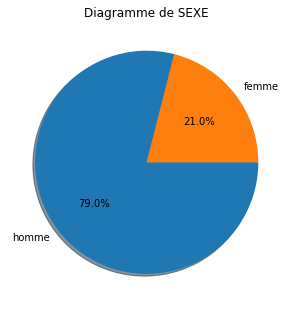

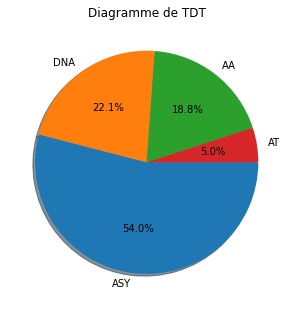

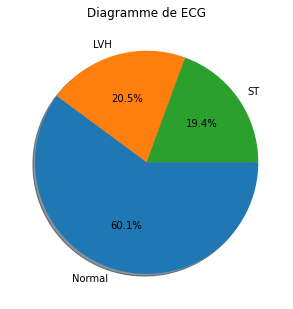

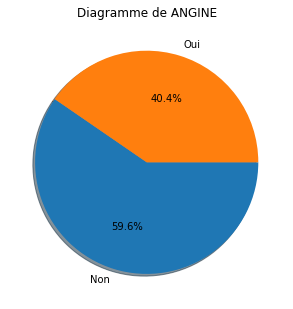

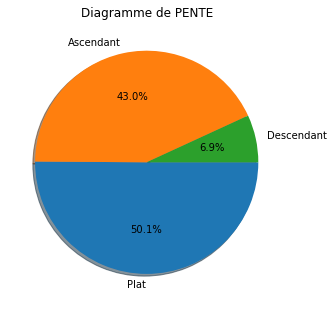

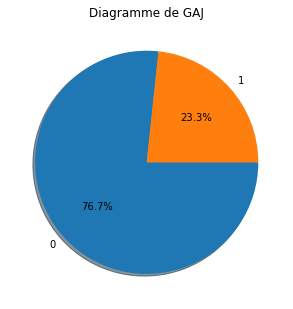

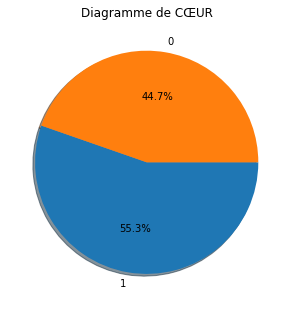

In [14]:
# def trace_camembert(variable, nb_color):
for col in objet_cols:
    plt.figure(figsize=(5, 8))
    count = df[col].value_counts()
    plt.pie(count.values, labels=count.index, autopct='%1.1f%%',
            counterclock=False, shadow=True)
    plt.title(f'Diagramme de {col}')

    plt.show()

### Variables quantitatives

In [15]:
import warnings
warnings.filterwarnings("ignore")

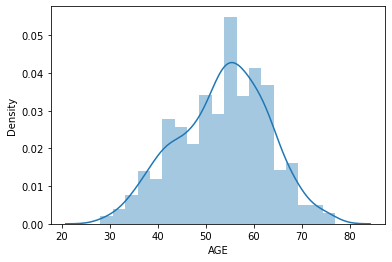

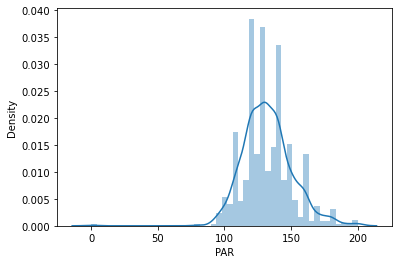

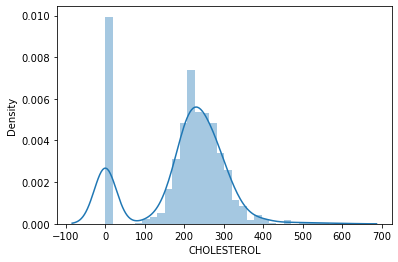

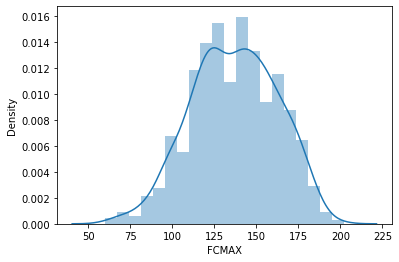

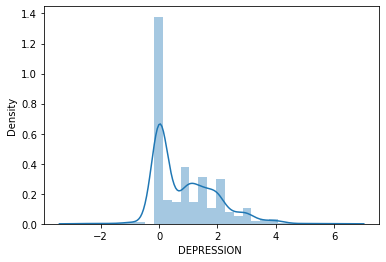

In [16]:
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

Les variables `CHOLESTEROL` et `DEPRESSION` ont une distribution particulière nous allons approfondir l'étude avec un test de normalité

In [91]:
from scipy.stats import shapiro, pearsonr, chi2_contingency, spearmanr

In [18]:
shapiro(df['CHOLESTEROL'])

ShapiroResult(statistic=0.8705924153327942, pvalue=6.972669126282614e-27)

In [19]:
shapiro(df['DEPRESSION '])

ShapiroResult(statistic=0.8598771095275879, pvalue=8.269326883616587e-28)

Au seuil de significativité de 5% ces deux variables ne suivent pas une loi normale

## Analyse Bivariée

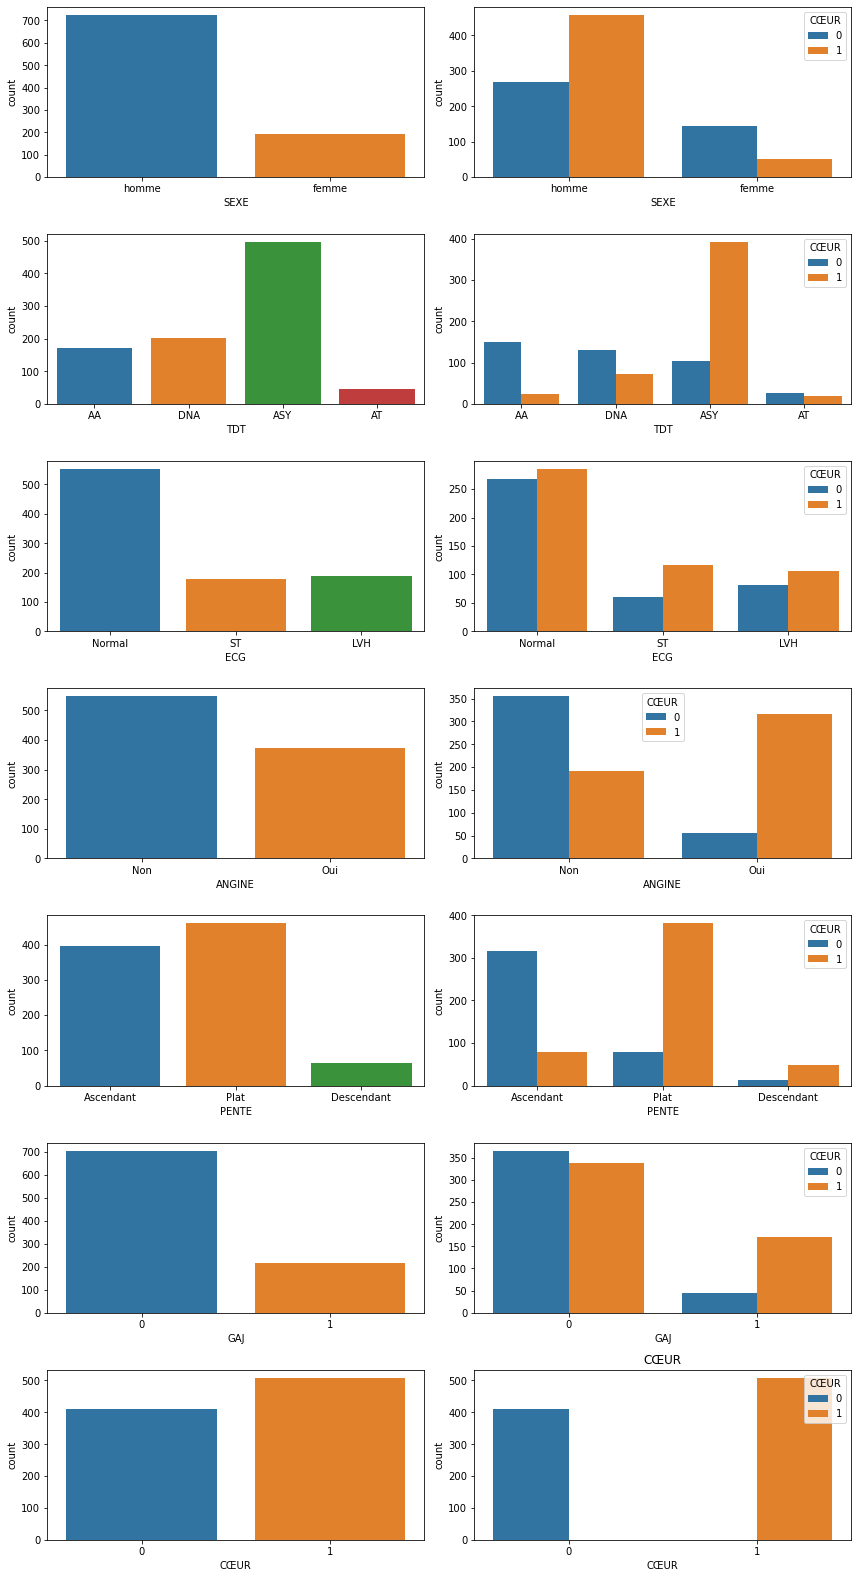

In [20]:
fig, ax = plt.subplots(len(objet_cols), 2, figsize=(12,22))

for i, col in enumerate(objet_cols):
    plt.title(objet_cols[i])
    sns.countplot(ax=ax[i, 0], x=df[col], data=df)
    sns.countplot(ax=ax[i, 1], x=df[col], hue='CŒUR', data=df)
fig.tight_layout(pad=1)
plt.show()

### Test de chi2
 
Je teste l'indépendance des variables qualitatives

H0 : Variables indépendantes si p-value > 5%

H1 : Variables non indépendantes si p-value < 5%

Les variables numériques du jeu de donnée sont donc indépendante

In [85]:
objet_len = len(objet_cols[:6])
a = np.empty((objet_len, objet_len))
a[:] = np.nan
for i, col1 in enumerate(objet_cols[:6]):
    for j, col2 in enumerate(objet_cols[:6]):
        df_con = pd.crosstab(df[col1], df[col2])
        a[i,j] = chi2_contingency(df_con, correction=False)[1]
df_chi2 = pd.DataFrame(a, columns=objet_cols[:6], index=objet_cols[:6])

In [87]:
df_chi2

,SEXE,TDT,ECG,ANGINE,PENTE,GAJ
SEXE,1.199167e-201,4.880336e-08,0.089122,7.611700e-09,1.831747e-05,2.746311e-04
TDT,4.880336e-08,0.000000e+00,0.003597,1.265910e-38,2.705381e-31,2.881967e-05
ECG,8.912244e-02,3.596781e-03,0.000000,4.941141e-03,1.032955e-01,4.947859e-04
ANGINE,7.611700e-09,1.265910e-38,0.004941,1.199167e-201,2.702856e-42,6.701616e-02
PENTE,1.831747e-05,2.705381e-31,0.103296,2.702856e-42,0.000000e+00,6.914947e-07
GAJ,2.746311e-04,2.881967e-05,0.000495,6.701616e-02,6.914947e-07,1.199167e-201


In [86]:
cm = sns.light_palette("green", as_cmap=True) 

df_chi2.\
style.background_gradient(cmap=cm).set_precision(2)

,SEXE,TDT,ECG,ANGINE,PENTE,GAJ
SEXE,0.00,0.00,0.09,0.00,0.00,0.00
TDT,0.00,0.00,0.00,0.00,0.00,0.00
ECG,0.09,0.00,0.00,0.00,0.10,0.00
ANGINE,0.00,0.00,0.00,0.00,0.00,0.07
PENTE,0.00,0.00,0.10,0.00,0.00,0.00
GAJ,0.00,0.00,0.00,0.07,0.00,0.00


Les variables marquées en vert sont dépendantes

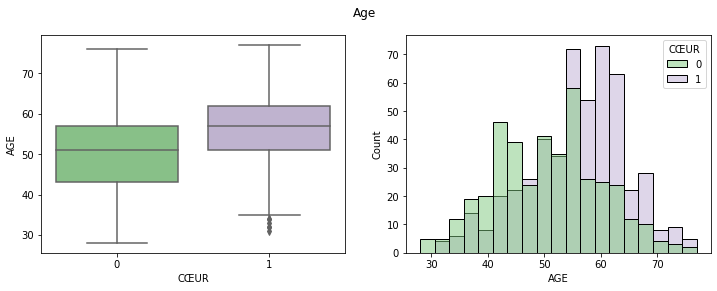

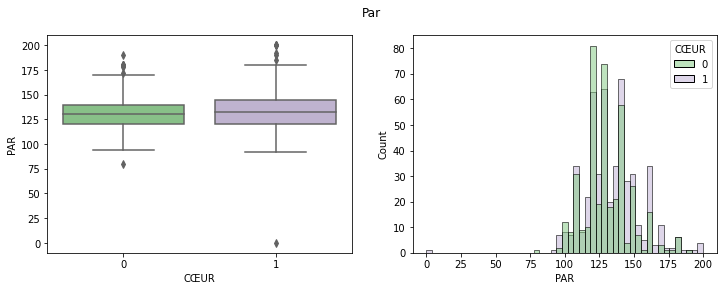

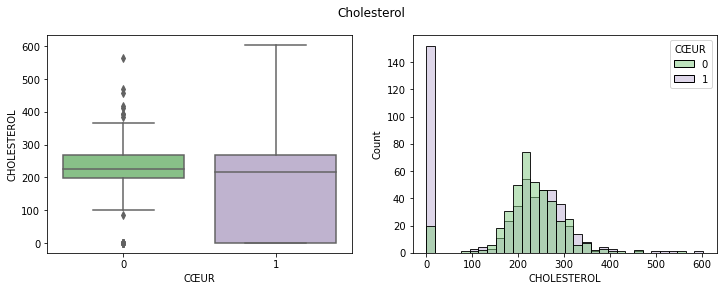

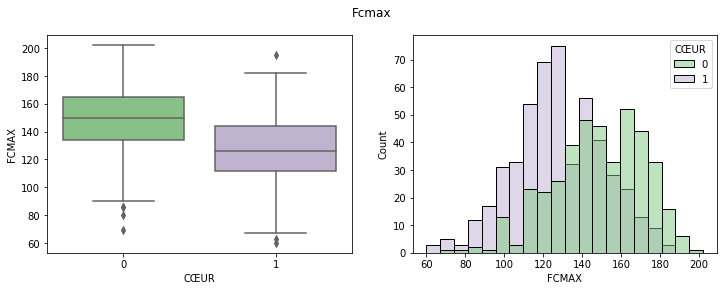

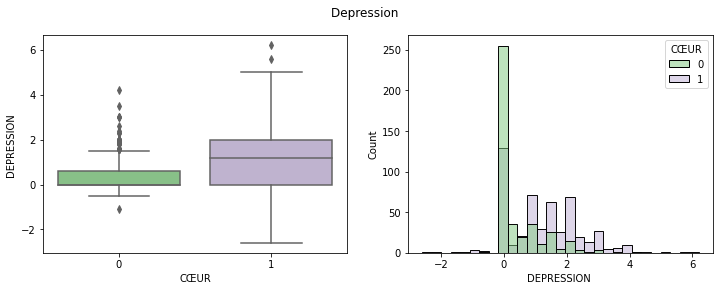

In [21]:
for i in num_cols:
    fig, axes = plt.subplots(1, 2,figsize=(12,4))
    fig.suptitle(i.title(),size=12)
    sns.boxplot(ax=axes[0], y=i, x='CŒUR',data=df, palette='Accent')
    sns.histplot(ax=axes[1], x=i, hue='CŒUR',data=df, palette='Accent')
    plt.show()

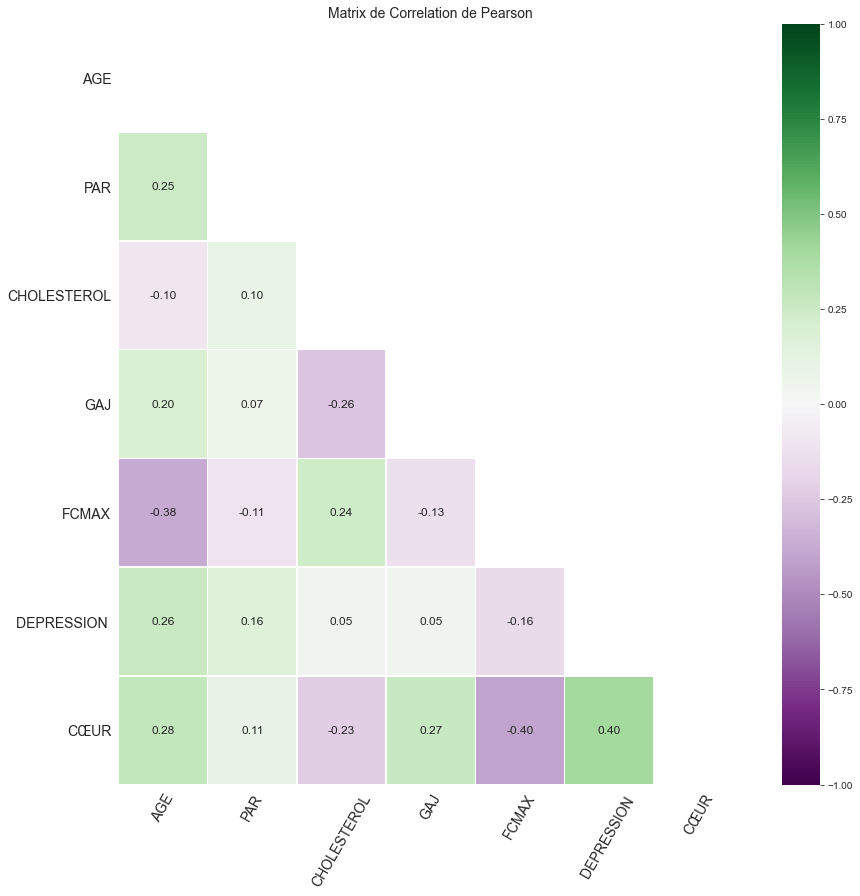

In [22]:
sns.set_style("white")
matrix = np.triu(df.corr(method="pearson"))
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),annot= True,fmt = ".2f",ax=ax,
            vmin = -1, vmax = 1, mask = matrix, cmap = "PRGn",
            linewidth = 0.4,linecolor = "white",annot_kws={"size": 12})
plt.xticks(rotation=60,size=14)
plt.yticks(rotation=0,size=14)
plt.title('Matrix de Correlation de Pearson', size = 14)
plt.show()

Il n'existe à priori pas de corrélations linéaires entre les variables quantitatives.

Vérifions le avec un test de corrélation de person.

r = 0 --- indépendance entre les variables si elles suivent une loi normale. 

In [90]:
from scipy.stats import pearsonr, chi2_contingency, spearmanr

In [26]:
a = np.empty((len(num_cols),len(num_cols),))
a[:] = np.nan
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
#         La première sortie correspond au coefficient de corrélation, la seconde à la p-value (ou probabilité critique)
        a[i,j] = pearsonr(df[num_cols[i]], df[num_cols[j]])[1]
df_pvalue = round(pd.DataFrame(a, columns=num_cols, index =num_cols),5)

In [89]:
df_pvalue

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
AGE,0.00000,0.00000,0.00386,0.00000,0.00000
PAR,0.00000,0.00000,0.00221,0.00066,0.00000
CHOLESTEROL,0.00386,0.00221,0.00000,0.00000,0.12894
FCMAX,0.00000,0.00066,0.00000,0.00000,0.00000
DEPRESSION,0.00000,0.00000,0.12894,0.00000,0.00000


In [25]:
cm = sns.light_palette("green", as_cmap=True) 

df_pvalue.\
style.background_gradient(cmap=cm).set_precision(2)

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
AGE,0.00,0.00,0.00,0.00,0.00
PAR,0.00,0.00,0.00,0.00,0.00
CHOLESTEROL,0.00,0.00,0.00,0.00,0.13
FCMAX,0.00,0.00,0.00,0.00,0.00
DEPRESSION,0.00,0.00,0.13,0.00,0.00


H0 : Variables indépendantes si p-value > 5%

H1 : Variables non indépendantes si p-value < 5%

Les variables numériques du jeu de donnée sont donc indépendante

les variables `DEPRESSION` et `CHOLESTEROL` semblent avoir une légère corrélation

Elles ne sont cependant pas normalement distribuées. Je vais donc réaliser une corrélation de sperman

In [92]:
rho, pval = spearmanr(df['DEPRESSION '], df['CHOLESTEROL'])
print(f"rho: {rho}, pvav:{pval}")

rho: 0.05172277149356373, pvav:0.11734013457972739


Cette corrélation n'est pas suffisante pour conclure à une corrélation linéaire des deux variables

### Quali - Quanti

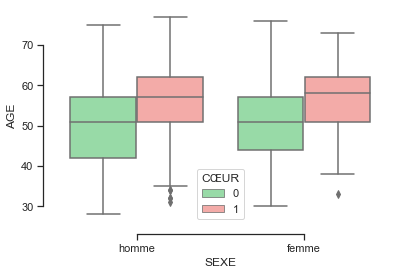

In [100]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="SEXE", y="AGE",
            hue="CŒUR", palette=["g", "r"],
            data=df)
sns.despine(offset=10, trim=True)

In [ ]:
for x in objet_cols:
    for y in num_cols:
        fig, axes = plt.subplots(figsize=(15,10))
    #     fig.suptitle(i.title(),size=12)
        sns.set_theme(style="ticks", palette="pastel")

        sns.boxplot(x=x, y=y,
                    hue="CŒUR", palette=["g", "r"],
                    data=df)
#         sns.boxplot(ax=axes[1], x=y, y=x,
#                     hue="CŒUR", palette=["g", "r"],
#                     data=df)
        sns.despine(offset=10, trim=True)
        print("================================================\n")
        plt.show()